# This notebook is used to generate graph instances for illustration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import networkx as nx # module useful for graph-visualization 

In [3]:
# helper function to visualize the MaxCut solution
def prepare_bipartite_graph(spin_orientations, J_adj):
    graph = nx.from_numpy_matrix(np.matrix(J_adj))
    node_colors = []
    for spin in spin_orientations:
        if spin == "0":
            node_colors.append('blue')
        elif spin == "1": 
            node_colors.append('green') 
        elif spin == "2":
            node_colors.append('crimson')
    return graph, node_colors

In [4]:
# main function to visualize the MaxCut solution
def plot_solution_graphs(qubit_number, solution_string, J_int, image_size, image_name):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=image_size)
    
    graph, node_colors = prepare_bipartite_graph("22222", J_int)
    nx.draw_circular(graph, node_size=700, node_color=node_colors, with_labels=True, ax=axs[0], label="t")
    
    graph, node_colors = prepare_bipartite_graph(solution_string[0], J_int)
    nx.draw_circular(graph, node_size=700, node_color=node_colors, with_labels=True, ax=axs[1], label="t")
    axs[1].annotate(r"$|$"+solution_string[0]+r"$\rangle$", xy=(0,0), xycoords='axes points',
                        size=20, bbox=dict(boxstyle='round', fc='w'))
    
    
    xy = (-0.9, 0)
    con = ConnectionPatch(xyA=(1.09,0), xyB=xy, coordsA="data", coordsB="data", 
                          axesA=axs[0], axesB=axs[1], color="black", lw=2, arrowstyle="simple")
    axs[0].add_artist(con)
    
    plt.savefig("images/"+image_name+".png", dpi=200)
    return 

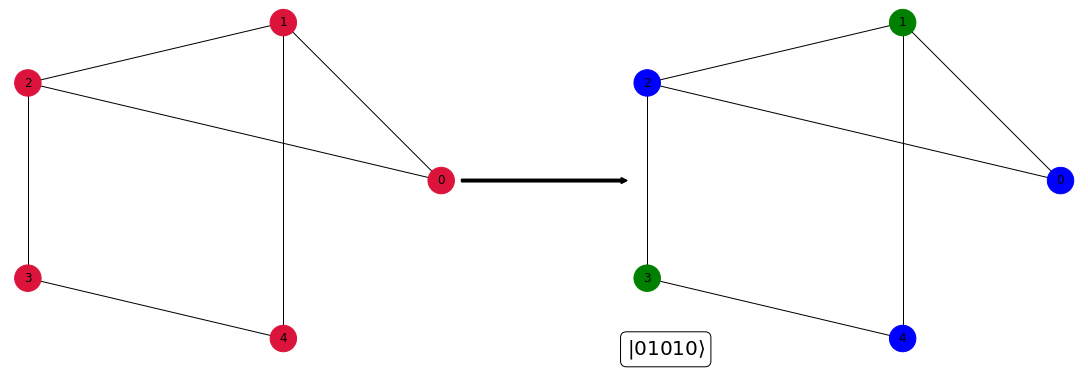

In [5]:
J_int = np.array([[0,1,1,1,1],
                  [1,0,1,1,1],
                  [1,1,0,1,1],
                  [1,1,1,0,1],
                  [1,1,1,1,0]]) 

J_int = np.array([[0,1,1,0,0],
                  [1,0,1,0,1],
                  [1,1,0,1,0],
                  [0,0,1,0,1],
                  [0,1,0,1,0]]) 

image_size = (15,5) # allows to set image size for optimal representation - size (15,20) is useful for many
image_name = "maxcut_example"
plot_solution_graphs(5, ["01010"], J_int, image_size, image_name)

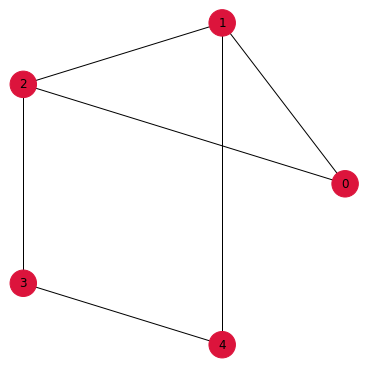

In [6]:
fig, axs = plt.subplots(constrained_layout=True, figsize=(5,5))
    
graph, node_colors = prepare_bipartite_graph("22222", J_int)
nx.draw_circular(graph, node_size=700, node_color=node_colors, with_labels=True, ax=axs, label="t")

image_name = "problem_graph"
plt.savefig("images/"+image_name+".png", dpi=200)